<br/><div id="top"></div>
<center><a style="font-size: 40pt; font-weight:bold"> Signal Processing TP3</a></center>
<br/>

---

# Group members
* Jauroyon, Maxime
* Bhatt, Ragi

---

# Exercise -  Noise spectrum density estimation and Wiener filtering

## Data

    various noise: noise1 noise2 noise3
    Barbara
    Music


## To do

    For each noise
        Estimate the spectrum density by periodogram and Welsh method
        Identify the color of the noise (white, pink, red…)

    With the image Barbara
        Simulate a noisy version of the image with various SNR (0dB, 5 dB, 10 dB, 15 dB, 20 dB), using a Gaussian white noise
        Denoise the image using the Wiener filter

    With the noised musics:
        Simulate a noisy version of the music using the three noises using a global factor of 0.1 for each noise.
        Denoise the sound using the Oracle Wiener filter.


---

<a style="font-size: 30pt; font-weight:bold"> 1. Noise spectrum density estimation and color identification </a>

## Import libraries

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.io.wavfile as wavfile
from scipy.fft import fft, fftfreq
from IPython.display import Audio

## Compute PSD with different methods

In [4]:
def plot_PSD(wavfilename):

    fs, noise_signal = wavfile.read(wavfilename)

     # Compute the power spectrum of the signal
    P = np.abs(fft(noise_signal)**2) / len(noise_signal)

    # Create the frequency axis
    f = fftfreq(len(noise_signal), 1/fs)

    # take the positive frequencies
    ind = np.where(f >= 0)

    # Calculate the periodogram
    frequencies, periodogram = signal.periodogram(noise_signal, fs=fs)

    # Calculate the Welch PSD
    frequencies_welch, psd_welch = signal.welch(noise_signal, fs=fs, window='hann', scaling='density', nperseg=1024)

    # Plot the signal
    plt.figure(figsize=(12, 6))
    plt.subplot(4, 1, 1)
    plt.plot(noise_signal)
    plt.title('Noise')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Plot the power spectrum with color 'tab:orange'
    plt.subplot(4, 1, 2)
    plt.semilogx(f[ind], 10 * np.log10(P[ind]),base=2, color='tab:orange')
    plt.title('Power spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')


    # Plot the periodogram
    plt.subplot(4, 1, 3)
    plt.semilogx(frequencies, 10 * np.log10(periodogram),base=2, color='tab:green')
    plt.title('Periodogram PSD')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB')

    # Plot the Welch PSD
    plt.subplot(4, 1, 4)
    plt.semilogx(frequencies_welch, 10 * np.log10(psd_welch),base=2, color='tab:red')
    plt.title('Welch PSD')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB)')

    plt.tight_layout()
    plt.show()


## Check the different PSD computation methods for the 3 noises

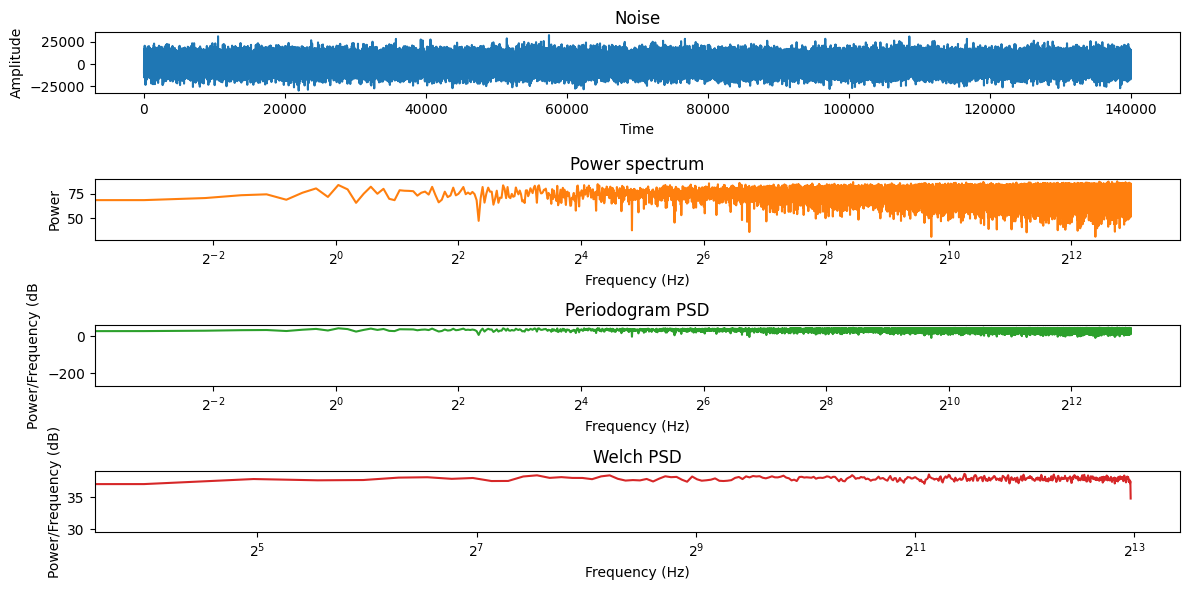

In [5]:
#We will now plot the PSD of the noise signal and display the audio file

plot_PSD('noise1.wav')
Audio('noise1.wav')


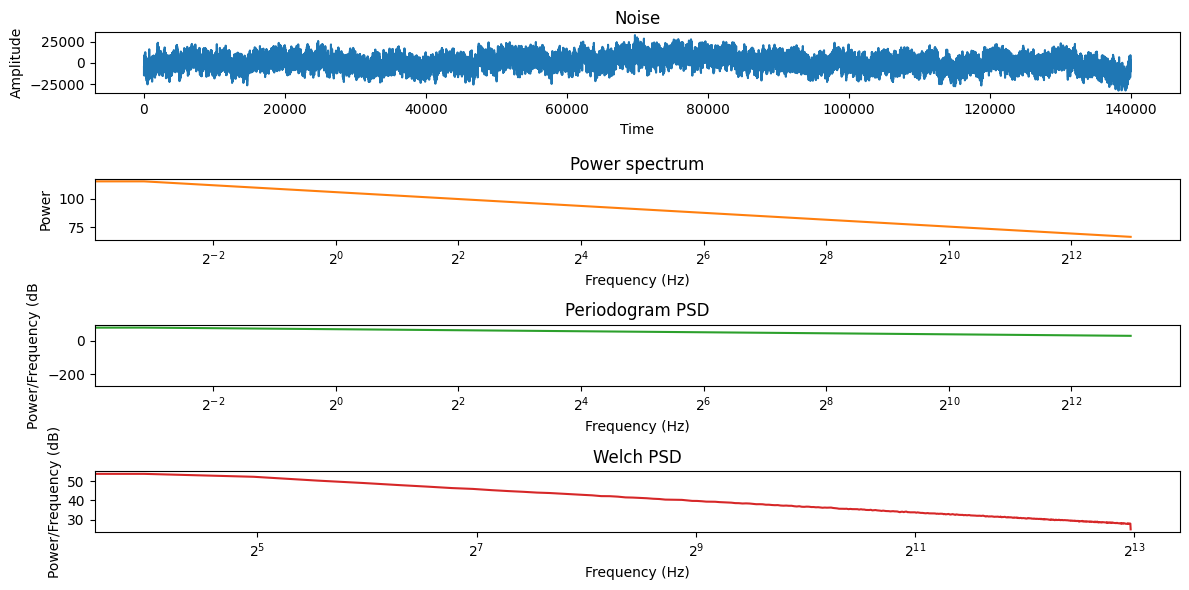

In [6]:
plot_PSD('noise2.wav')
Audio('noise2.wav')

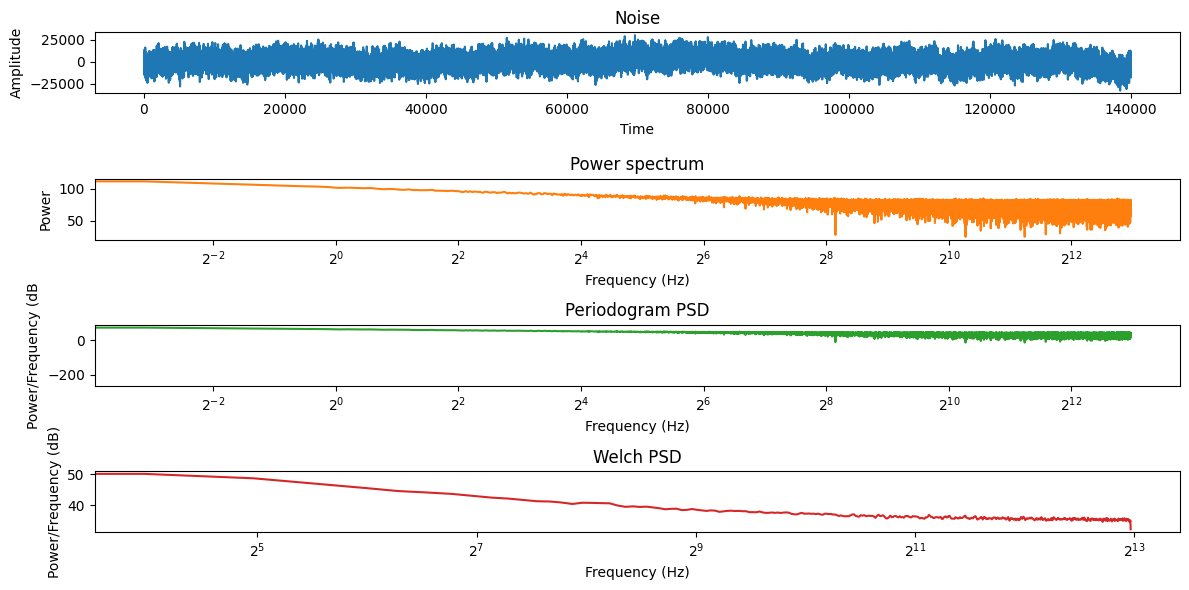

In [7]:
plot_PSD('noise3.wav')
Audio('noise3.wav')

Note: We observe differences between the 3 methods. The periodogram method is very noisy and consistent across the varying frequencies whereas the Welch method is smoother. The Welch method is the best method to estimate the PSD, so we will use it to guess the color of the noise.

## Comparison Plot:

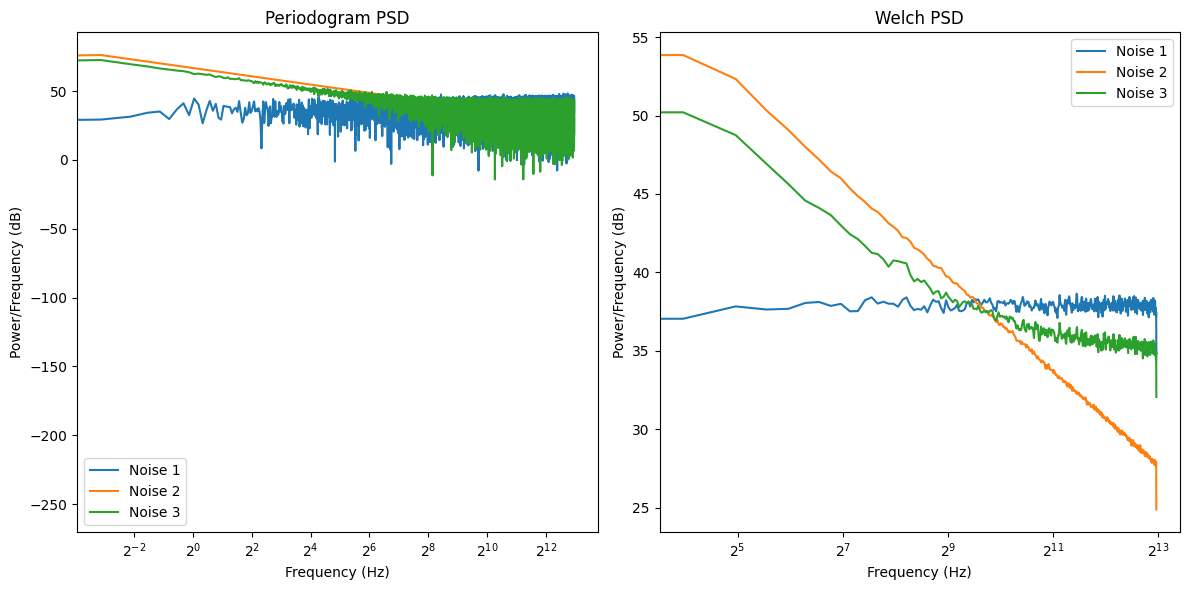

In [8]:
# plot them on the same plot to compare
fs1, noise_signal1 = wavfile.read('noise1.wav')
fs2, noise_signal2 = wavfile.read('noise2.wav')
fs3, noise_signal3 = wavfile.read('noise3.wav')

# Compute the Periodogram PSD of the signals
frequencies1, P1 = signal.periodogram(noise_signal1, fs=fs1)
frequencies2, P2 = signal.periodogram(noise_signal2, fs=fs2)
frequencies3, P3 = signal.periodogram(noise_signal3, fs=fs3)

# Compute the Welch PSD of the signals
frequencies_welch1, psd_welch1 = signal.welch(noise_signal1, fs=fs1, window='hann', scaling='density', nperseg=1024)
frequencies_welch2, psd_welch2 = signal.welch(noise_signal2, fs=fs2, window='hann', scaling='density', nperseg=1024)
frequencies_welch3, psd_welch3 = signal.welch(noise_signal3, fs=fs3, window='hann', scaling='density', nperseg=1024)

# Plot the signals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.semilogx(frequencies1, 10 * np.log10(P1), label='Noise 1',base=2)
plt.semilogx(frequencies2, 10 * np.log10(P2), label='Noise 2',base=2)
plt.semilogx(frequencies3, 10 * np.log10(P3), label='Noise 3',base=2)
plt.title('Periodogram PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB)')
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(frequencies_welch1, 10 * np.log10(psd_welch1), label='Noise 1',base=2)
plt.semilogx(frequencies_welch2, 10 * np.log10(psd_welch2), label='Noise 2',base=2)
plt.semilogx(frequencies_welch3, 10 * np.log10(psd_welch3), label='Noise 3',base=2)
plt.title('Welch PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB)')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
#Lets calculate the slope of the PSDs to determine the type of noise

# Calculate the slope of the Periodogram PSDs
slope1 = np.polyfit(np.log2(frequencies1[1:]), 10 * np.log10(P1[1:]), 1)[0]
slope2 = np.polyfit(np.log2(frequencies2[1:]), 10 * np.log10(P2[1:]), 1)[0]
slope3 = np.polyfit(np.log2(frequencies3[1:]), 10 * np.log10(P3[1:]), 1)[0]

# Calculate the slope of the Welch PSDs
slope_welch1 = np.polyfit(np.log2(frequencies_welch1[1:]), 10 * np.log10(psd_welch1[1:]), 1)[0]
slope_welch2 = np.polyfit(np.log2(frequencies_welch2[1:]), 10 * np.log10(psd_welch2[1:]), 1)[0]
slope_welch3 = np.polyfit(np.log2(frequencies_welch3[1:]), 10 * np.log10(psd_welch3[1:]), 1)[0]

# Print the slopes
print('Periodogram PSDs:')
print('Noise 1: ', slope1)
print('Noise 2: ', slope2)
print('Noise 3: ', slope3)

print('\nWelch PSDs:')
print('Noise 1: ', slope_welch1)
print('Noise 2: ', slope_welch2)
print('Noise 3: ', slope_welch3)


Periodogram PSDs:
Noise 1:  0.00020174234064274118
Noise 2:  -3.0103005939410994
Noise 3:  -1.3786519608313998

Welch PSDs:
Noise 1:  -0.009622900481991074
Noise 2:  -3.0157066359551865
Noise 3:  -1.124384879888458


## To determine the color based on the PSD of the noise, we will look at the slope of the PSD:

    -Noise 1 is white noise, because the PSD of the noise is constant across the range of the frequency.
    -Noise 2 is Pink Noise because we see the power decrease with the frequency.
    -The slope for Noise 3 is between the white and pink noise, it might be closer to pink noise but might not be a good fit for the typical characteristsics of the white or pink noise. So it is a bit ambiguous.
    

---

<a style="font-size: 30pt; font-weight:bold"> 2. Noising and Denoising Image </a>

## following the matlab numerical tour (https://nbviewer.org/github/gpeyre/numerical-tours/blob/master/matlab/denoisingsimp_2b_linear_image.ipynb)

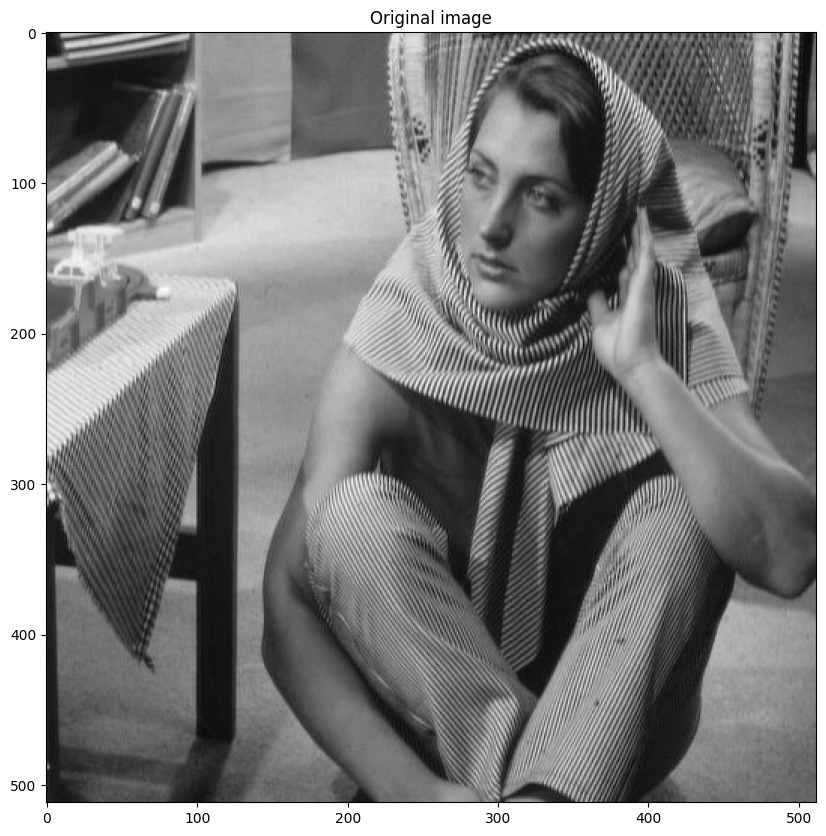

n =  512
N =  262144


In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from scipy import ndimage
from scipy import signal
from scipy.fft import fft, fftfreq, fft2, ifft2, fftshift, ifft, ifftshift
from scipy import stats

# Load image
img = mpimg.imread('barbara.jpg')
img = img[:,:,0]

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.show()

n = img.shape[0]
N = n**2
print('n = ', n)
print('N = ', N)

## Adding noise to the image to match the SNR

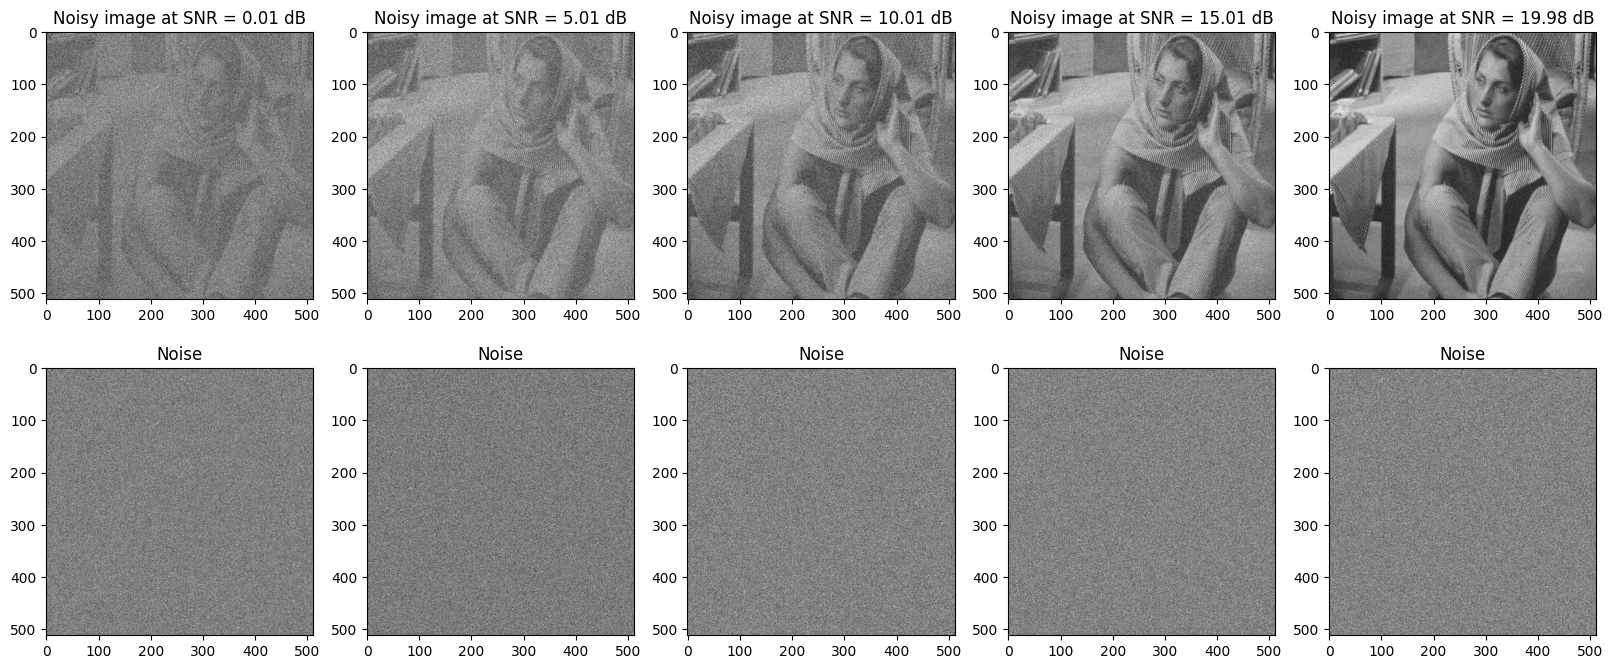

In [13]:
# We want to have a precise db of SNR after adding Gaussian white noise
# for that we need to compute the variance of the noise with respect to the SNR

def add_noise(img, SNR):
    # Compute the variance of the noise
    sigma = np.sqrt(np.linalg.norm(img)**2/(N*10**(SNR/10)))

    # Gaussian white noise
    noise = sigma * np.random.randn(n,n)

    # noisy image
    y = img + noise

    # Compute the SNR
    SNR = 20*np.log10(np.linalg.norm(img)/np.linalg.norm(img-y))

    return y, SNR, sigma, noise

# plot all the images with different SNR (0dB, 5 dB, 10 dB, 15 dB, 20 dB) on a same plot so we can compare easily

def plot_all(img):
    SNR = [0, 5, 10, 15, 20]
    plt.figure(figsize=(20,8))
    for i in range(5):
        y, snr, sig, noiseT = add_noise(img, SNR[i])

        # plot the noisy image above
        plt.subplot(2, 5, i+1)
        plt.imshow(y, cmap='gray')
        plt.title('Noisy image at SNR = ' + str(round(snr, 2)) + ' dB')

        # plot the noise below the image
        plt.subplot(2, 5, i+6)
        plt.imshow(noiseT, cmap='gray')
        plt.title('Noise')

    plt.show()
    

plot_all(img)

## The higher the SNR, the less noise there is. The image is almost not noisy at 20dB

## Denoising the noisy images using the Wiener filter

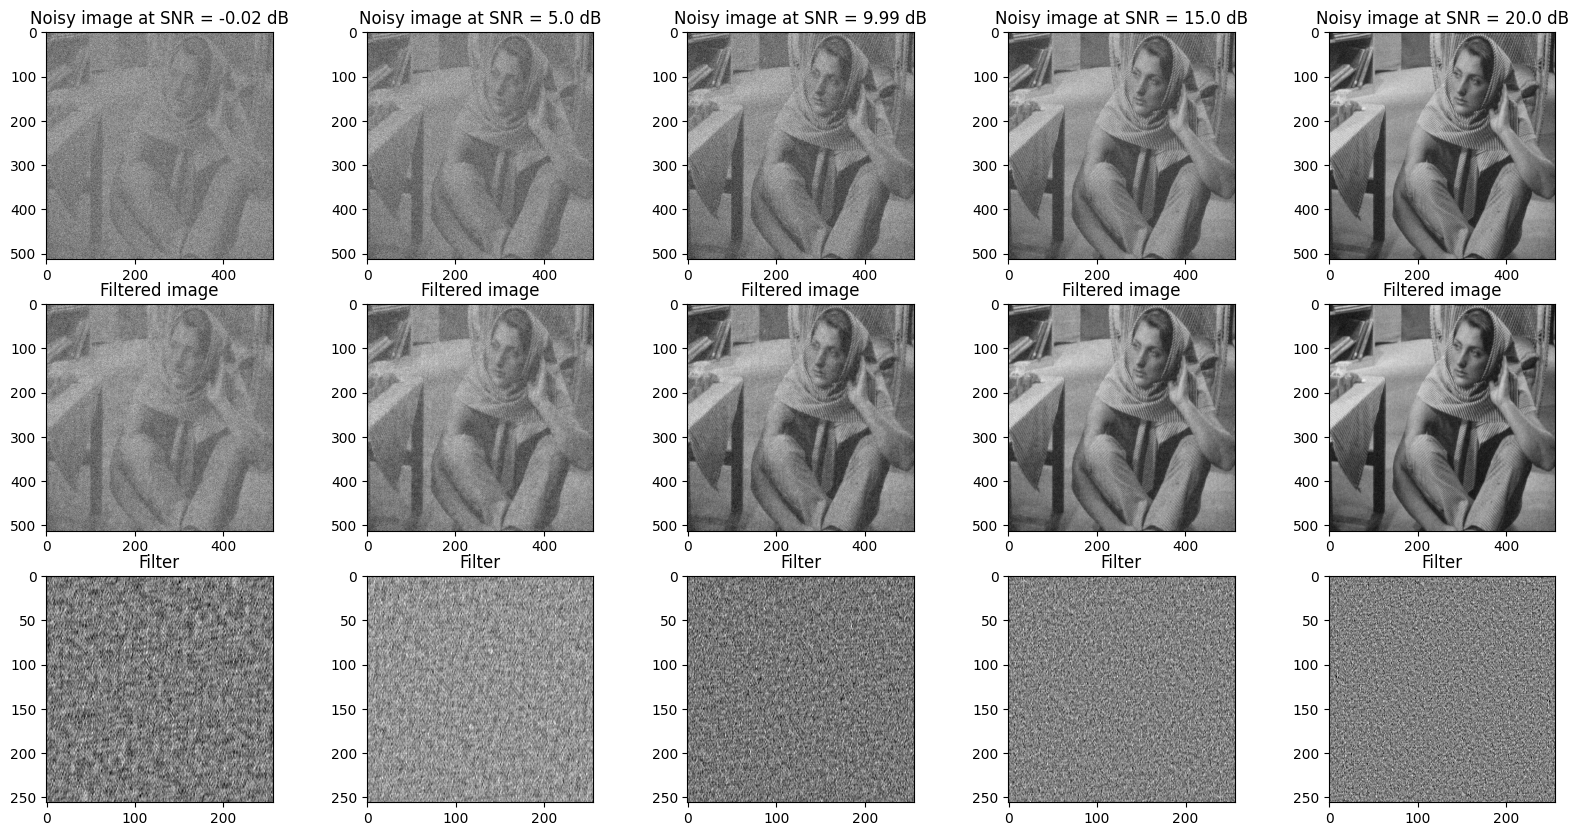

In [14]:
# Wiener Filtering
def wiener_filter(img, sigma, noise):
    # Compute the power spectrum
    P = 1/N * np.abs(fft2(img))**2

    # Compute the Oracle Wiener filter
    # h_w = np.real(ifft2(P/(P+sigma**2)))

    # Compute the Wiener filter
    h_w = np.real(ifft2(P/(P+(1/N * np.abs(fft2(noise))**2))))

    # Compute the filtered image in fourier domain
    y_w = np.real(ifft2(fft2(img)*fft2(h_w)))

    return h_w, y_w, P

# plot all the images with different SNR (0dB, 5 dB, 10 dB, 15 dB, 20 dB) on a same plot so we can compare easily

def plot_all(img):
    SNR = [0, 5, 10, 15, 20]
    plt.figure(figsize=(20,10))
    for i in range(5):
        y, snr, sig, noiseT = add_noise(img, SNR[i])
        h_w, y_w, P = wiener_filter(y, sig, noiseT)
        
        # plot the noisy image above the filtered image
        plt.subplot(3, 5, i+1)
        plt.imshow(y, cmap='gray')
        plt.title('Noisy image at SNR = ' + str(round(snr, 2)) + ' dB')

        # plot the filtered image in the middle
        plt.subplot(3, 5, i+6)
        plt.imshow(y_w, cmap='gray')
        plt.title('Filtered image')

        # plot the filter below the image
        plt.subplot(3, 5, i+11)
        # only plot the center square of the filter
        plt.imshow(h_w[n//4:3*n//4, n//4:3*n//4], cmap='gray')
        plt.title('Filter')
        
    plt.show()

plot_all(img)


## The Wiener filter (formula and not the already implemented function) is not very efficient for denoising the image. The image is still noisy. It feels like we only gain 5dB of SNR.

---

<a style="font-size: 30pt; font-weight:bold"> 3. Noising and denoising of sound </a>

## Using Weiner filter to denoise the sound

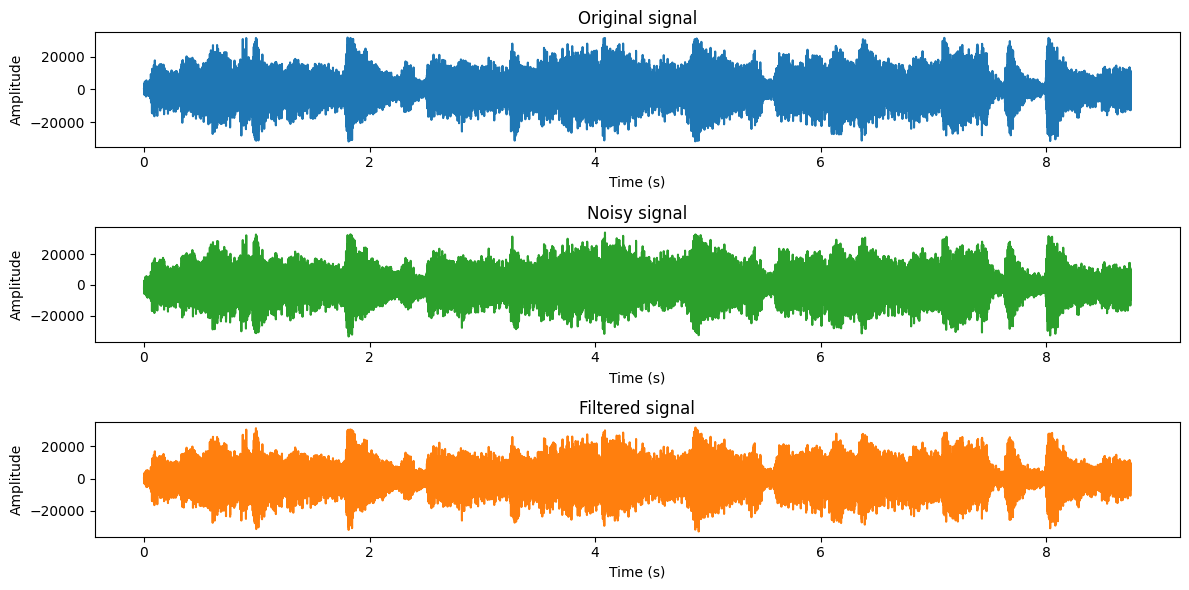

In [43]:
# Simulate a noisy version of the music using the three noises using a global factor of 0.1 for each noise.
#         Denoise the sound using the Oracle Wiener filter.

# Import the modules we need
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

# Read the wav file
fs, data = wavfile.read('music.wav')

# Create a time vector
t = np.arange(data.shape[0]) / fs

# Plot the signal 
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, data)
plt.title('Original signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the power spectrum of the original signal
# P = np.abs(fft(data))**2 / len(data)
# f = fftfreq(len(data), 1/fs)
# ind = np.where(f >= 0)
# plt.plot(3, 1, 1)
# plt.semilogx(f[ind], 10 * np.log10(P[ind]),base=2)
# plt.title('Power spectrum')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Power')



# Simulate a noisy version of the music using the three noises using a global factor of 0.1 for each noise.

# Read the noises   
fs, noise1 = wavfile.read('noise1.wav')
fs, noise2 = wavfile.read('noise2.wav')
fs, noise3 = wavfile.read('noise3.wav')

# Simulate a noisy version of the music using the three noises using a global factor of 0.1 for each noise.

# Create the noisy signal
noise_signal = 0.1*noise1 + 0.1*noise2 + 0.1*noise3 + data

# Plot the noisy signal
plt.subplot(3, 1, 2)
plt.plot(t, noise_signal, color='tab:green')
plt.title('Noisy signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the power spectrum of the noisy signal
# P = np.abs(fft(noise_signal))**2 / len(noise_signal)
# f = fftfreq(len(noise_signal), 1/fs)
# ind = np.where(f >= 0)
# plt.plot(3, 1, 2)
# plt.semilogx(f[ind], 10 * np.log10(P[ind]),base=2, color='tab:green')
# plt.title('Power spectrum')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Power')




# Wiener filter
def wiener_filter(data, noise1, noise2, noise3):
    # ---------------------------------------------
    # First option is to do it step by step

    # # Compute the power spectrum of the signal
    # P = np.abs(fft(data))**2 / len(data)

    # # Compute the power spectrum of the noises
    # P1 = np.abs(fft(noise1))**2 / len(noise1)
    # P2 = np.abs(fft(noise2))**2 / len(noise2)
    # P3 = np.abs(fft(noise3))**2 / len(noise3)

    # # Compute the Oracle Wiener filter
    # h_w = np.real(ifft(P/(P+0.1*P1)))

    # # Compute the filtered signal in fourier domain
    # y_w = np.real(ifft(fft(data)*fft(h_w)))

    # # do it again but for the second noise
    # # Compute the power spectrum of the signal
    # P = np.abs(fft(y_w))**2 / len(y_w)

    # # Compute the Oracle Wiener filter
    # h_w = np.real(ifft(P/(P+0.1*P2)))

    # # Compute the filtered signal in fourier domain
    # y_w = np.real(ifft(fft(y_w)*fft(h_w)))

    # # do it again but for the third noise
    # # Compute the power spectrum of the signal
    # P = np.abs(fft(y_w))**2 / len(y_w)

    # # Compute the Oracle Wiener filter
    # h_w = np.real(ifft(P/(P+0.1*P3)))

    # # Compute the filtered signal in fourier domain
    # y_w = np.real(ifft(fft(y_w)*fft(h_w)))

    # ---------------------------------------------
    # Second option is to do it in one step

    # Compute the power spectrum of the signal
    P = np.abs(fft(data))**2 / len(data)

    # Compute the power spectrum of the noises
    P1 = np.abs(fft(noise1))**2 / len(noise1)
    P2 = np.abs(fft(noise2))**2 / len(noise2)
    P3 = np.abs(fft(noise3))**2 / len(noise3)

    # Compute the Oracle Wiener filter
    h_w = np.real(ifft(P/(P+0.1*P1+0.1*P2+0.1*P3)))

    # Compute the filtered signal in fourier domain
    y_w = np.real(ifft(fft(data)*fft(h_w)))

    return h_w, y_w, P

# Denoise the signal
h_w, y_w, P = wiener_filter(noise_signal, noise1, noise2, noise3)

# Plot the filtered signal

plt.subplot(3, 1, 3)
plt.plot(t, y_w, color='tab:orange')
plt.title('Filtered signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')



plt.tight_layout()
plt.show()


In [46]:
#display the audio file
print("After denoising the audio file:")
Audio(y_w, rate=fs)

After denoising the audio file:


## We can't tell the difference between the 3 signals just by looking at it (unlike the image)

In [33]:
# determine how well the filter work by computing the SNR of the filtered signal

# Compute the SNR
SNR = 20*np.log10(np.linalg.norm(data)/np.linalg.norm(data-y_w))
print('SNR_filtered = ', round(SNR,2), 'dB')

# Compute the SNR of the nosiy signal
SNR_noise = 20*np.log10(np.linalg.norm(data)/np.linalg.norm(data-noise_signal))
print('SNR_noise = ', round(SNR_noise,2), 'dB')

print("---------------------------------------------")
# compare the mean squared error this time

# Compute the MSE
MSE = np.mean((data-y_w)**2)

# Compute the MSE of the nosiy signal
MSE_noise = np.mean((data-noise_signal)**2)

print('MSE_filtered = ', round(MSE))
print('MSE_noise = ', round(MSE_noise))

SNR_filtered =  17.15 dB
SNR_noise =  12.77 dB
---------------------------------------------
MSE_filtered =  1086872
MSE_noise =  2985004


## We used the Wiener filter to denoise the sound, and not Oracle Wiener filter, because we already have the noises and the difference was minimal in the image case.

## We tried 2 approaches:
    1. Apply the Wiener filter step by step with each noise
    2. Apply the Wiener filter in a single step with the sum of the 3 noises

## The second approach is showing better results.
    Noisy signal: MSE = 2 985 004
    Denoised signal 1st approach : MSE = 1 451 824
    Denoised signal 2nd approach : MSE = 1 086 872
    -------------------------------
    Noisy signal: SNR = 12.77 dB
    Denoised signal 1st approach : SNR = 15.9 dB
    Denoised signal 2nd approach : SNR = 17.15 dB